In [1]:
import numpy as np 
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling3D, Flatten, Dropout,Input, GlobalMaxPooling2D, GlobalAveragePooling2D
import seaborn as sns
sns.set_theme(style="dark")
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import MobileNetV3Small, MobileNetV3Large
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
import shutil
import random
from keras.optimizers import Adam

In [2]:
import glob
import pandas as pd

In [46]:
root = "pls"
input_dir = os.path.join(root)
train_dir = os.path.join(input_dir, 'train')
val_dir = os.path.join(input_dir, 'val',"test")

In [47]:
dataset_dir = [dir for dir in sorted(os.listdir(input_dir)) if os.path.isdir(os.path.join(input_dir, dir))]
label_name = [subdir for subdir in sorted(os.listdir(train_dir)) if os.path.isdir(os.path.join(train_dir, subdir))]

In [48]:
# dir_dict = {'train': train_dir, 'val': val_dir}
# case_count, img_disp, set_length  = {}, {}, {}

# for key, val in dir_dict.items():
#     case_count[key] = {}
#     img_disp[key] = {}
#     set_count = 0
    
#     for label in label_name:
#         label_list = list(sorted(glob.glob(os.path.join(val, label, "*.jpg"))))
#         if len(label_list) == 0:
#           continue

#         case_count[key][label] = len(label_list)
#         set_count += len(label_list)
        
#         select_img_id = np.random.randint(len(label_list)-1)
#         # print(select_img_id)
#         img_disp[key][label] = label_list[select_img_id]
#     set_length[key] = set_count

# case_count_df = pd.DataFrame(case_count)
# img_disp_df = pd.DataFrame(img_disp)

for png and jpg

In [49]:
dir_dict = {'train': train_dir, 'val': val_dir}
case_count, img_disp, set_length = {}, {}, {}
valid_extensions = ['.jpg', '.png']

for key, val in dir_dict.items():
    case_count[key] = {}
    img_disp[key] = {}
    set_count = 0
    
    for label in label_name:
        label_list = []
        for ext in valid_extensions:
            label_list.extend(glob.glob(os.path.join(val, label, f"*{ext}")))
            
        if len(label_list) == 0:
            continue

        case_count[key][label] = len(label_list)
        set_count += len(label_list)
        
        select_img_id = np.random.randint(len(label_list))
        img_disp[key][label] = label_list[select_img_id]
        
    set_length[key] = set_count

case_count_df = pd.DataFrame(case_count)
img_disp_df = pd.DataFrame(img_disp)

In [50]:
case_count_df = pd.DataFrame(case_count)
img_disp_df = pd.DataFrame(img_disp)
print(f"Dataset summary:\n\n{case_count_df}")

Dataset summary:

       train   val
real    2468  3400
spoof  13046  3399


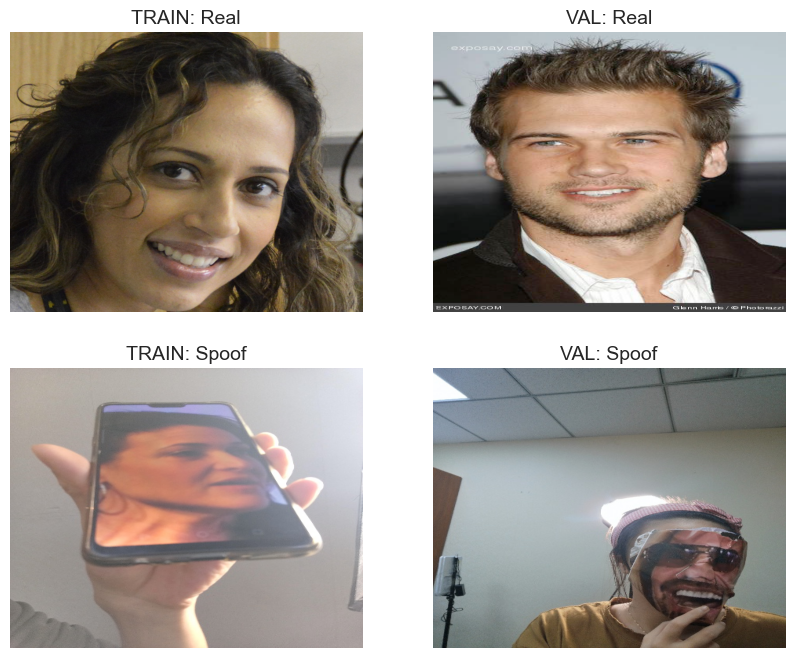

In [51]:
num_classes = len(label_name)
num_dataset = 0
for key, val in set_length.items():
  num_dataset += 1 if val > 0 else 0

f, ax = plt.subplots(num_classes, num_dataset, figsize=(num_dataset*5, 8))

for k in range(num_classes*num_dataset):
    j, i = k//num_dataset, k%num_dataset  # Image indexing
    
    img = cv.imread(img_disp_df.iloc[j, i])
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    ax[j, i].imshow(img, cmap='gray')
    ax[j, i].set_title(f"{img_disp_df.columns[i].upper()}: {img_disp_df.index[j].capitalize()}", fontsize=14)
    ax[j, i].axis('off')
    ax[j, i].set_aspect('auto')
plt.show()

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   fill_mode="nearest",)
                                #    preprocessing_function =  lambda x : cv.GaussianBlur(cv.cvtColor(x,cv.COLOR_BGR2RGB),(5,5),random.randint(1,5)))


val_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              classes=["spoof","real"],
                                              target_size = (224, 224),shuffle=True)

val_gen = val_datagen.flow_from_directory(val_dir,
                                          batch_size = 32,
                                          class_mode = 'binary',
                                          classes=["spoof","real"],
                                          target_size = (224, 224),shuffle=True)

Found 15514 images belonging to 2 classes.
Found 6799 images belonging to 2 classes.


In [54]:
print(f'Train set batch shape\t: {next(train_gen)[0].shape}')
print(f'Val set batch shape\t: {next(val_gen)[0].shape}')

Train set batch shape	: (32, 224, 224, 3)
Val set batch shape	: (32, 224, 224, 3)


In [55]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), 1,  activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), 1,  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3), 1, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))

# model.add(Dense(1, activation='sigmoid', name='classifier'))

In [56]:
# history = model.fit(
#     train_gen,
#     steps_per_epoch = train_gen.samples // 32,
#     validation_data = val_gen,
#     validation_steps = 1,epochs = 10)

In [57]:
train_batch_size = 32
val_batch_size = 32
img_width = 224
img_height = 224

pretrain_net = MobileNetV2(input_shape = (img_width, img_height, 3),
                                        include_top = False,
                                        weights = 'imagenet')


freeze_before = None  

if freeze_before:
    for layer in pretrain_net.layers:
        if layer.name == freeze_before:
            break
        else:
            layer.trainable = False


In [58]:
x = pretrain_net.output
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Dropout(rate=0.2, name='extra_dropout1')(x)
x = GlobalAveragePooling2D()(x)
#x = Dense(units=128, activation='relu', name='extra_fc1')(x)
#x = Dropout(rate=0.2, name='extra_dropout2')(x)
x = Dense(1, activation='sigmoid', name='classifier')(x)

model = Model(inputs=pretrain_net.input, outputs=x, name='mobilenetv2_spoof')
print(model.summary())

Model: "mobilenetv2_spoof"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                 

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [60]:
train_id = "lcc-train04b-weight_all"  # ID of the training procedure
num_epochs = 15  # Set the number of epochs to train
learning_rate = 5e-5  # Set the learning rate to use

print(f"Training config of '{train_id}'...")
print(f"Number of epoch\t: {num_epochs}")
print(f"Initial LR\t: {learning_rate}")

model.compile(optimizer = Adam(learning_rate=learning_rate),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# Define model callback
save_dir = os.path.join("./", train_id)
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

cont_filepath = "mobilenetv2-epoch_{epoch:02d}.hdf5"
cont_checkpoint = ModelCheckpoint(os.path.join(save_dir, cont_filepath))

best_filepath = "mobilenetv2-best.hdf5"
best_checkpoint = ModelCheckpoint(os.path.join(save_dir, best_filepath),
                                  save_best_only=True,
                                  save_weights_only=True)

# Instantiate tensorboard
log_dir = os.path.join(save_dir, "logs")
use_tensorboard = TensorBoard(log_dir=log_dir,
                              histogram_freq=1,
                              update_freq="batch")

# Instantiate learning rate scheduler with Plateau method
plateau_scheduler = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1, 
                                      min_delta= 0.005, min_lr=5e-7)

# Displaying tensorboard
#%tensorboard --logdir log_dir

# Define class weight
train_length = len(train_gen.classes)
weight0 = train_length / case_count_df['train'][label_name[0]] * (1 / len(label_name))
weight1 = train_length / case_count_df['train'][label_name[1]] * (1 / len(label_name))
class_weight = {0: weight0, 1: weight1}

print(f"Class weight\t: {class_weight}")

Training config of 'lcc-train04b-weight_all'...
Number of epoch	: 15
Initial LR	: 5e-05
Class weight	: {0: 3.143030794165316, 1: 0.5945883795799479}


In [61]:
model.summary()

Model: "mobilenetv2_spoof"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                 

In [62]:
history = model.fit(train_gen,
                    epochs = num_epochs,
                    steps_per_epoch = set_length['train'] // train_batch_size,
                    validation_data = val_gen,
                    validation_steps = 1,
                    callbacks = [best_checkpoint,
                                 cont_checkpoint,
                                 plateau_scheduler],
                    class_weight=class_weight)

history_df = pd.DataFrame.from_dict(history.history)
history_df.to_csv(os.path.join(save_dir, "history.csv"), index=False)

Epoch 1/15
484/484 [==============================] - 1187s 2s/step - loss: 0.1167 - acc: 0.9518 - val_loss: 1.0416 - val_acc: 0.7812 - lr: 5.0000e-05
Epoch 2/15
484/484 [==============================] - 1182s 2s/step - loss: 0.0318 - acc: 0.9871 - val_loss: 0.6943 - val_acc: 0.8125 - lr: 5.0000e-05
Epoch 3/15
484/484 [==============================] - 1185s 2s/step - loss: 0.0200 - acc: 0.9922 - val_loss: 1.2597 - val_acc: 0.7188 - lr: 5.0000e-05
Epoch 4/15
484/484 [==============================] - 1315s 3s/step - loss: 0.0138 - acc: 0.9952 - val_loss: 1.6213 - val_acc: 0.6250 - lr: 5.0000e-05
Epoch 5/15
484/484 [==============================] - ETA: 0s - loss: 0.0134 - acc: 0.9947
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
484/484 [==============================] - 1184s 2s/step - loss: 0.0134 - acc: 0.9947 - val_loss: 1.9835 - val_acc: 0.7500 - lr: 5.0000e-05
Epoch 6/15
484/484 [==============================] - 1183s 2s/step - loss: 0.0069 - acc: